In [1]:
# Task 1: Data Preparation...........................

In [2]:
# 1.1)cload the data set

import pandas as pd
data = pd.read_csv("Telco_Customer_Churn_Dataset  (3).csv")

# display first rows
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# 1.2) initial data exploration

#data set shape
data.shape


(7043, 21)

In [4]:
#data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#statical summary
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# 02) Handling missing values

#check missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# 04) Categorical Variable Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in data.select_dtypes(include="object").columns:
    data[col] = le.fit_transform(data[col])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


In [9]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [10]:
# 05) separate features and target 

# the target column is churn

x = data.drop("Churn", axis=1)
y = data["Churn"]


In [30]:
# 06) Dataset splitting

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x,y,
    test_size = 0.2,
    random_state = 42
)

In [31]:
# Task 2: Exploratory Data Analysis (EDA)............

In [49]:
# 01) data visdualization & statistical analysis + churn rate calculation

import matplotlib.pyplot as plt

# Clean churn column
data["Churn"] = data["Churn"].astype(str)
data["Churn"] = data["Churn"].str.strip()
data["Churn"] = data["Churn"].str.lower()

# Map to binary
data["Churn_binary"] = data["Churn"].map({"1": 1, "0": 0})



In [50]:
print(data["Churn"].unique())

['0' '1']


In [51]:
# visualize churn rate

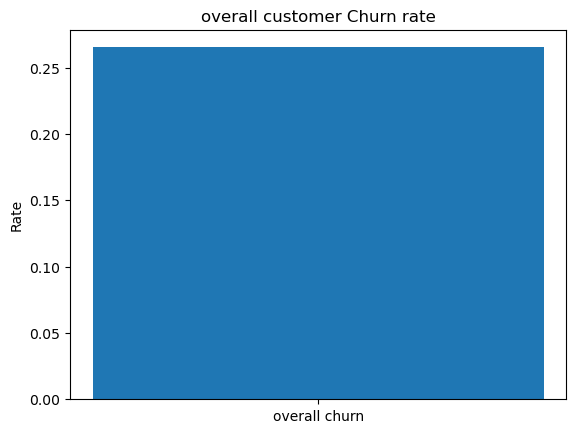

In [52]:

plt.figure()
plt.bar(["overall churn"], [Churn_rate])
plt.ylabel("Rate")
plt.title("overall customer Churn rate")
plt.show()

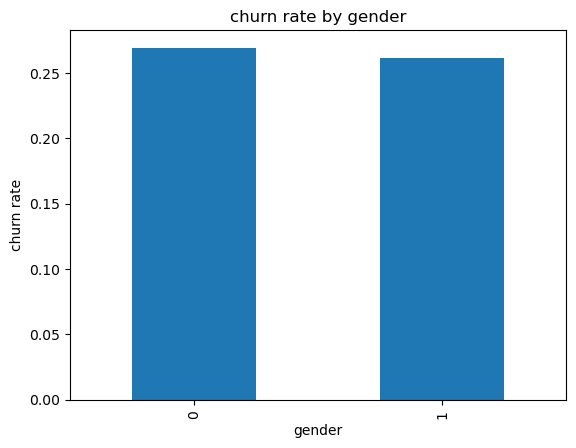

In [53]:
# 02) Exploratory data analysis 

#gender VS churn

plt.figure()
data.groupby("gender")["Churn_binary"].mean().plot(kind="bar")
plt.ylabel("churn rate")
plt.title("churn rate by gender")
plt.show()



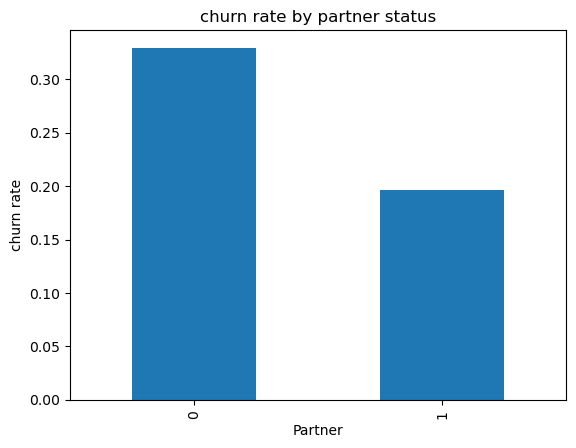

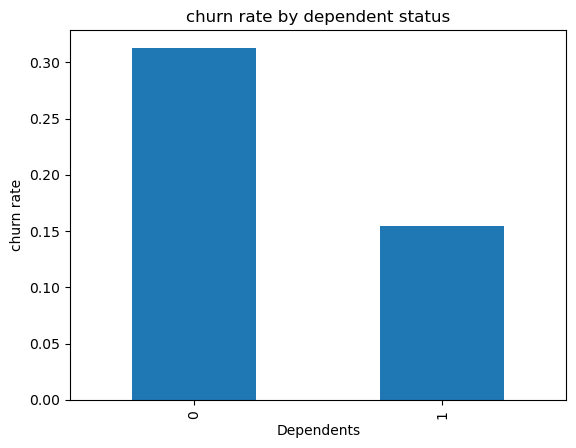

In [54]:
# 03) Understanding of customer demographic variables

# partner status VS churn
plt.figure()
data.groupby("Partner")["Churn_binary"].mean().plot(kind="bar")
plt.ylabel("churn rate")
plt.title("churn rate by partner status")
plt.show()

#dependent status VS churn
plt.figure()
data.groupby("Dependents")["Churn_binary"].mean().plot(kind="bar")
plt.ylabel("churn rate")
plt.title("churn rate by dependent status")
plt.show()


In [56]:
# 04) Churn rate calculation

# Calculate churn rate
Churn_rate = data["Churn_binary"].mean()

print("Overall Churn Rate:", Churn_rate)
print("churn rate precentage: ", Churn_rate*100)

Overall Churn Rate: 0.2653698707936959
churn rate precentage:  26.536987079369588


In [ ]:
# Task 3: Customer Segmentation.......................

In [57]:
# Tenure based segmentation

data["tenure_segment"]=pd.cut(
    data["tenure"],
    bins=[0,12,36,72],
    labels=["short term", "mid term", "long term"]
)

In [60]:
data.head().tenure_segment

0    short term
1      mid term
2    short term
3     long term
4    short term
Name: tenure_segment, dtype: category
Categories (3, object): ['short term' < 'mid term' < 'long term']

In [63]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_binary,tenure_segment
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,1,2,29.85,2505,0,0,short term
1,3962,1,0,0,0,34,1,0,0,2,...,0,0,1,0,3,56.95,1466,0,0,mid term
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,1,3,53.85,157,1,1,short term
3,5535,1,0,0,0,45,0,1,0,2,...,0,0,1,0,0,42.30,1400,0,0,long term
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,1,2,70.70,925,1,1,short term


In [116]:
# monthly charges segmentation
data["charges_segment"] = pd.cut(
    data["MonthlyCharges"],
    bins=[0,50,80,120],
    labels=["low", "medium", "high"]
)

In [117]:
data.head().charges_segment

0       low
1    medium
2    medium
3       low
4    medium
Name: charges_segment, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [118]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_binary,tenure_segment,charges_segment,contract_segment
0,5375,0,0,1,0,1,0,1,0,0,...,0,1,2,29.85,2505,0,0,short term,low,0
1,3962,1,0,0,0,34,1,0,0,2,...,1,0,3,56.95,1466,0,0,mid term,medium,1
2,2564,1,0,0,0,2,1,0,0,2,...,0,1,3,53.85,157,1,1,short term,medium,0
3,5535,1,0,0,0,45,0,1,0,2,...,1,0,0,42.30,1400,0,0,long term,low,1
4,6511,0,0,0,0,2,1,0,1,0,...,0,1,2,70.70,925,1,1,short term,medium,0


In [119]:
data["contract_segment"] = data["Contract"]

In [120]:
# churn analysis within segments
 # churn by tenure segment

data.groupby("tenure_segment")["Churn_binary"].mean()


<ipython-input-120-fe6f035d8d86>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("tenure_segment")["Churn_binary"].mean()


tenure_segment
short term    0.476782
mid term      0.255388
long term     0.119294
Name: Churn_binary, dtype: float64

In [121]:
  # churn by monthly charges segment

data.groupby("charges_segment")["Churn_binary"].mean()

<ipython-input-121-285b9d0b13dd>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("charges_segment")["Churn_binary"].mean()


charges_segment
low       0.157025
medium    0.289702
high      0.339835
Name: Churn_binary, dtype: float64

In [122]:
  # churn by contract type

data.groupby("contract_segment")["Churn_binary"].mean()
 

contract_segment
0    0.427097
1    0.112695
2    0.028319
Name: Churn_binary, dtype: float64

In [142]:
# identify high value coustomer at risk

high_risk_customers = data[
    (data["MonthlyCharges"] > 70 ) &
    (data["tenure"] <= 36) &
    (data["Contract"] == 0)   
]
high_risk_customers.head()
    

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_binary,tenure_segment,charges_segment,contract_segment
4,6511,0,0,0,0,2,1,0,1,0,...,0,1,2,70.70,925,1,1,short term,medium,0
5,6551,0,0,0,0,8,1,2,1,0,...,0,1,2,99.65,6104,1,1,short term,high,0
6,1002,1,0,0,1,22,1,2,1,0,...,0,1,1,89.10,1550,0,0,mid term,high,0
8,5604,0,0,1,0,28,1,2,1,0,...,0,1,2,104.80,2646,1,1,mid term,high,0
14,3615,1,0,0,0,25,1,0,1,2,...,0,1,2,105.50,2337,0,0,mid term,high,0


In [143]:
# count high-risk high-value customers

high_risk_customers.shape[0]

1606

In [148]:
# already churned High-value customers

high_value_churned = high_risk_customers[
    high_risk_customers["Churn"] == "1"
    ]

high_value_churned.shape[0]

939

In [ ]:
# Task 4: Churn Prediction Model.....................

In [149]:
# train-test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x,y,
    test_size = 0.2,
    random_state = 42
)

In [151]:
# model-1 : Logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [152]:
# model-2 : Decision tree classifier

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)

In [153]:
# model evalution metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [161]:
# Logistic regression metrics

print("Logistic regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("precision:", precision_score(y_test, y_pred_lr))
print("Recall:",recall_score(y_test, y_pred_lr))
print("F1 score:", f1_score(y_test, y_pred_lr))

Logistic regression
Accuracy: 0.815471965933286
precision: 0.6805111821086262
Recall: 0.5710455764075067
F1 score: 0.6209912536443148


In [162]:
# Decision Tree Metrics

print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("precision:", precision_score(y_test, y_pred_dt))
print("Recall:",recall_score(y_test, y_pred_dt))
print("F1 score:", f1_score(y_test, y_pred_dt))

Decision Tree
Accuracy: 0.7189496096522356
precision: 0.46981627296587924
Recall: 0.47989276139410186
F1 score: 0.47480106100795755


In [166]:
# feature sselection using Logistic Regression coefficients
import pandas as pd

feature_importance = pd.Series(
    lr.coef_[0], index=x.columns
).sort_values(ascending=False)

feature_importance.head(10)

PaperlessBilling    0.317655
SeniorCitizen       0.198173
InternetService     0.179467
MultipleLines       0.106847
Partner             0.096541
PaymentMethod       0.033974
StreamingMovies     0.030616
MonthlyCharges      0.024774
TotalCharges        0.000053
customerID         -0.000023
dtype: float64

In [167]:
# Hyperparameter Tuning (Decision Tree)

from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3,5,7,10],
    "min_samples_split":[2,5,10]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="f1"
)

grid.fit(x_train, y_train)

best_model = grid.best_estimator_
    

In [168]:
# Evaluate Tuned model

y_pred_best = best_model.predict(x_test)

print("Tuned Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("precision:", precision_score(y_test, y_pred_best))
print("Recall:",recall_score(y_test, y_pred_best))
print("F1 score:", f1_score(y_test, y_pred_best))

Tuned Decision Tree
Accuracy: 0.7856635911994322
precision: 0.5988857938718662
Recall: 0.5764075067024129
F1 score: 0.587431693989071


In [ ]:
# Task 5: Model Evaluation and Interpretation..........

AUC score:  0.8600101441924498


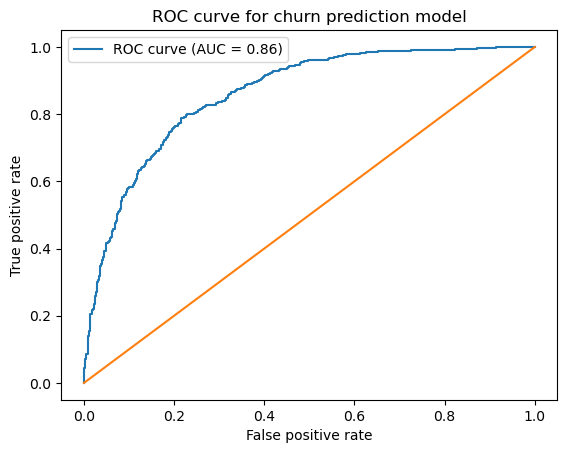

In [173]:
# ROC curve and AUC calculation

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

#AUC score
roc_auc = auc(fpr, tpr)

print("AUC score: ", roc_auc)

#plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label = "ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1], linestyle="-")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve for churn prediction model")
plt.legend()
plt.show()



In [ ]:
# model performance interpretation
# ROC curve closer to top left corner---- better model
# telco churn models usually achieve AUC= 0.80+, which is considerd good,
